<a href="https://colab.research.google.com/github/azinghasemi/University-Semester01-FDA-FDA_Set_Exercise-/blob/main/FDA_Set_Exercise_Azin_ghasemi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/azinghasemi/University-Semester01-FDA-FDA_Set_Exercise-.git


fatal: destination path 'University-Semester01-FDA-FDA_Set_Exercise-' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    train_test_split,
    KFold,
    TimeSeriesSplit,
    cross_val_score
)
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
from scipy import stats
from pandas.tseries.holiday import USFederalHolidayCalendar


In [3]:
df_raw = pd.read_csv('University-Semester01-FDA-FDA_Set_Exercise-/sales_data.csv')
df_raw.info()
df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

### **Discriptive**

In [4]:
df_grocery.describe()


,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000,30400.000000
mean,360.314770,102.872862,103.231678,51.657799,9.116118,0.328947,52.952144,0.200000,120.976447
std,254.054486,47.162922,192.763276,28.456253,7.487723,0.469839,29.588040,0.400007,48.362730
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,167.000000,70.000000,0.000000,25.057500,5.000000,0.000000,25.757500,0.000000,86.000000
50%,296.000000,97.500000,0.000000,51.785000,10.000000,0.000000,52.410000,0.000000,116.000000
75%,493.000000,130.000000,136.000000,72.800000,10.000000,1.000000,74.350000,0.000000,151.000000
max,2267.000000,426.000000,1616.000000,163.990000,25.000000,1.000000,187.260000,1.000000,430.000000


In [5]:
# import pandas as pd
# import numpy as np
# from scipy import stats

# # Load data


# # Filter for 'Groceries' category

# # Identify numeric columns
# numeric_cols = df_grocery.select_dtypes(include=[np.number]).columns

# # --- Z-Score Method ---
# z_scores = np.abs(stats.zscore(df_grocery[numeric_cols], nan_policy='omit'))
# outlier_mask_z = (z_scores > 3).any(axis=1)
# removed_z = set(df_grocery[outlier_mask_z].index)
# cleaned_z_count = len(df_grocery) - len(removed_z)

# # --- IQR Method ---
# Q1 = df_grocery[numeric_cols].quantile(0.25)
# Q3 = df_grocery[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outlier_mask_iqr = ((df_grocery[numeric_cols] < lower_bound) | (df_grocery[numeric_cols] > upper_bound)).any(axis=1)
# removed_iqr = set(df_grocery[outlier_mask_iqr].index)
# cleaned_iqr_count = len(df_grocery) - len(removed_iqr)

# # --- Overlap Analysis ---
# removed_both = removed_z.intersection(removed_iqr)
# removed_z_only = removed_z - removed_iqr
# removed_iqr_only = removed_iqr - removed_z

# # Print results
# print("Comparison of Outlier Removal Methods (Groceries):")
# print("-------------------------------------------------")
# print(f"Total original rows: {len(df_grocery)}\n")

# print("Z-Score Method:")
# print(f"  • Removed rows (|z| > 3): {len(removed_z)}")
# print(f"  • Cleaned rows: {cleaned_z_count}\n")

# print("IQR Method:")
# print(f"  • Removed rows (outside 1.5×IQR): {len(removed_iqr)}")
# print(f"  • Cleaned rows: {cleaned_iqr_count}\n")

# print("Overlap Between Methods:")
# print(f"  • Rows removed by both methods: {len(removed_both)}")
# print(f"  • Rows removed only by Z-Score: {len(removed_z_only)}")
# print(f"  • Rows removed only by IQR: {len(removed_iqr_only)}")


In [6]:

# # Filter for 'Groceries' category
# df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()

# # Identify numeric columns
# numeric_cols = df_grocery.select_dtypes(include=['number']).columns

# # Calculate Q1, Q3, and IQR for each numeric column
# Q1 = df_grocery[numeric_cols].quantile(0.25)
# Q3 = df_grocery[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1

# # Determine outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Create mask for outliers
# outlier_mask = ((df_grocery[numeric_cols] < lower_bound) |
#                 (df_grocery[numeric_cols] > upper_bound)).any(axis=1)

# # Remove outliers
# df_grocery_clean = df_grocery[~outlier_mask].copy()

# # TESTs
# # Check that no rows in cleaned DataFrame fall outside IQR bounds
# violation_mask = ((df_grocery_clean[numeric_cols] < lower_bound) |
#                   (df_grocery_clean[numeric_cols] > upper_bound)).any(axis=1)
# assert violation_mask.sum() == 0, "Some values in cleaned DataFrame are still outside IQR bounds!"

# # Ensure that original outlier indices are removed
# original_outlier_indices = set(df_grocery[outlier_mask].index)
# clean_indices = set(df_grocery_clean.index)
# assert original_outlier_indices.isdisjoint(clean_indices), "Some outliers were not removed!"

# # Print results
# print(f"Original rows: {len(df_grocery)}, Cleaned rows: {len(df_grocery_clean)}")


In [7]:
df_grocery_clean=df_grocery.copy()
df_grocery_clean['Date'] = pd.to_datetime(df_grocery_clean['Date'])
df_grocery_clean['YearMonth'] = df_grocery_clean['Date'].dt.to_period('M')


In [8]:

# df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()

# df_before== df_raw[df_raw['Category'] == 'Groceries'].copy()
# df_before['Date'] = pd.to_datetime(df_before['Date'])
# df_before['YearMonth'] = df_before['Date'].dt.to_period('M')
# # Prepare data for boxplots: demand per month before and after outlier removal
# months = sorted(df_before['YearMonth'].unique())
# demand_before = [
#     df_before[df_before['YearMonth'] == m]['Demand']
#     for m in months
# ]
# demand_after = [
#     df_grocery_clean[df_grocery_clean['YearMonth'] == m]['Demand']
#     for m in months
# ]
# month_labels = [str(m) for m in months]

# # Plot boxplots side by side for before and after
# plt.figure(figsize=(14, 6))

# # Boxplot for 'Before Removal'
# plt.subplot(1, 2, 1)
# plt.boxplot(
#     demand_before,
#     labels=month_labels,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightgreen', color='black'),
#     medianprops=dict(color='red'),
#     flierprops=dict(marker='o', markerfacecolor='orange', markersize=4)
# )
# plt.title('Demand Before Outlier Removal')
# plt.xlabel('Year-Month')
# plt.ylabel('Demand')
# plt.xticks(rotation=45)
# plt.grid(True, axis='y')

# # Boxplot for 'After Removal'
# plt.subplot(1, 2, 2)
# plt.boxplot(
#     demand_after,
#     labels=month_labels,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightblue', color='black'),
#     medianprops=dict(color='red'),
#     flierprops=dict(marker='o', markerfacecolor='orange', markersize=4)
# )
# plt.title('Demand After Outlier Removal (IQR)')
# plt.xlabel('Year-Month')
# plt.ylabel('Demand')
# plt.xticks(rotation=45)
# plt.grid(True, axis='y')

# plt.tight_layout()
# plt.show()


In [9]:
# load data and change string date to pandas date
df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()
df_grocery['Date'] = pd.to_datetime(df_grocery['Date'])


### **Histogram**

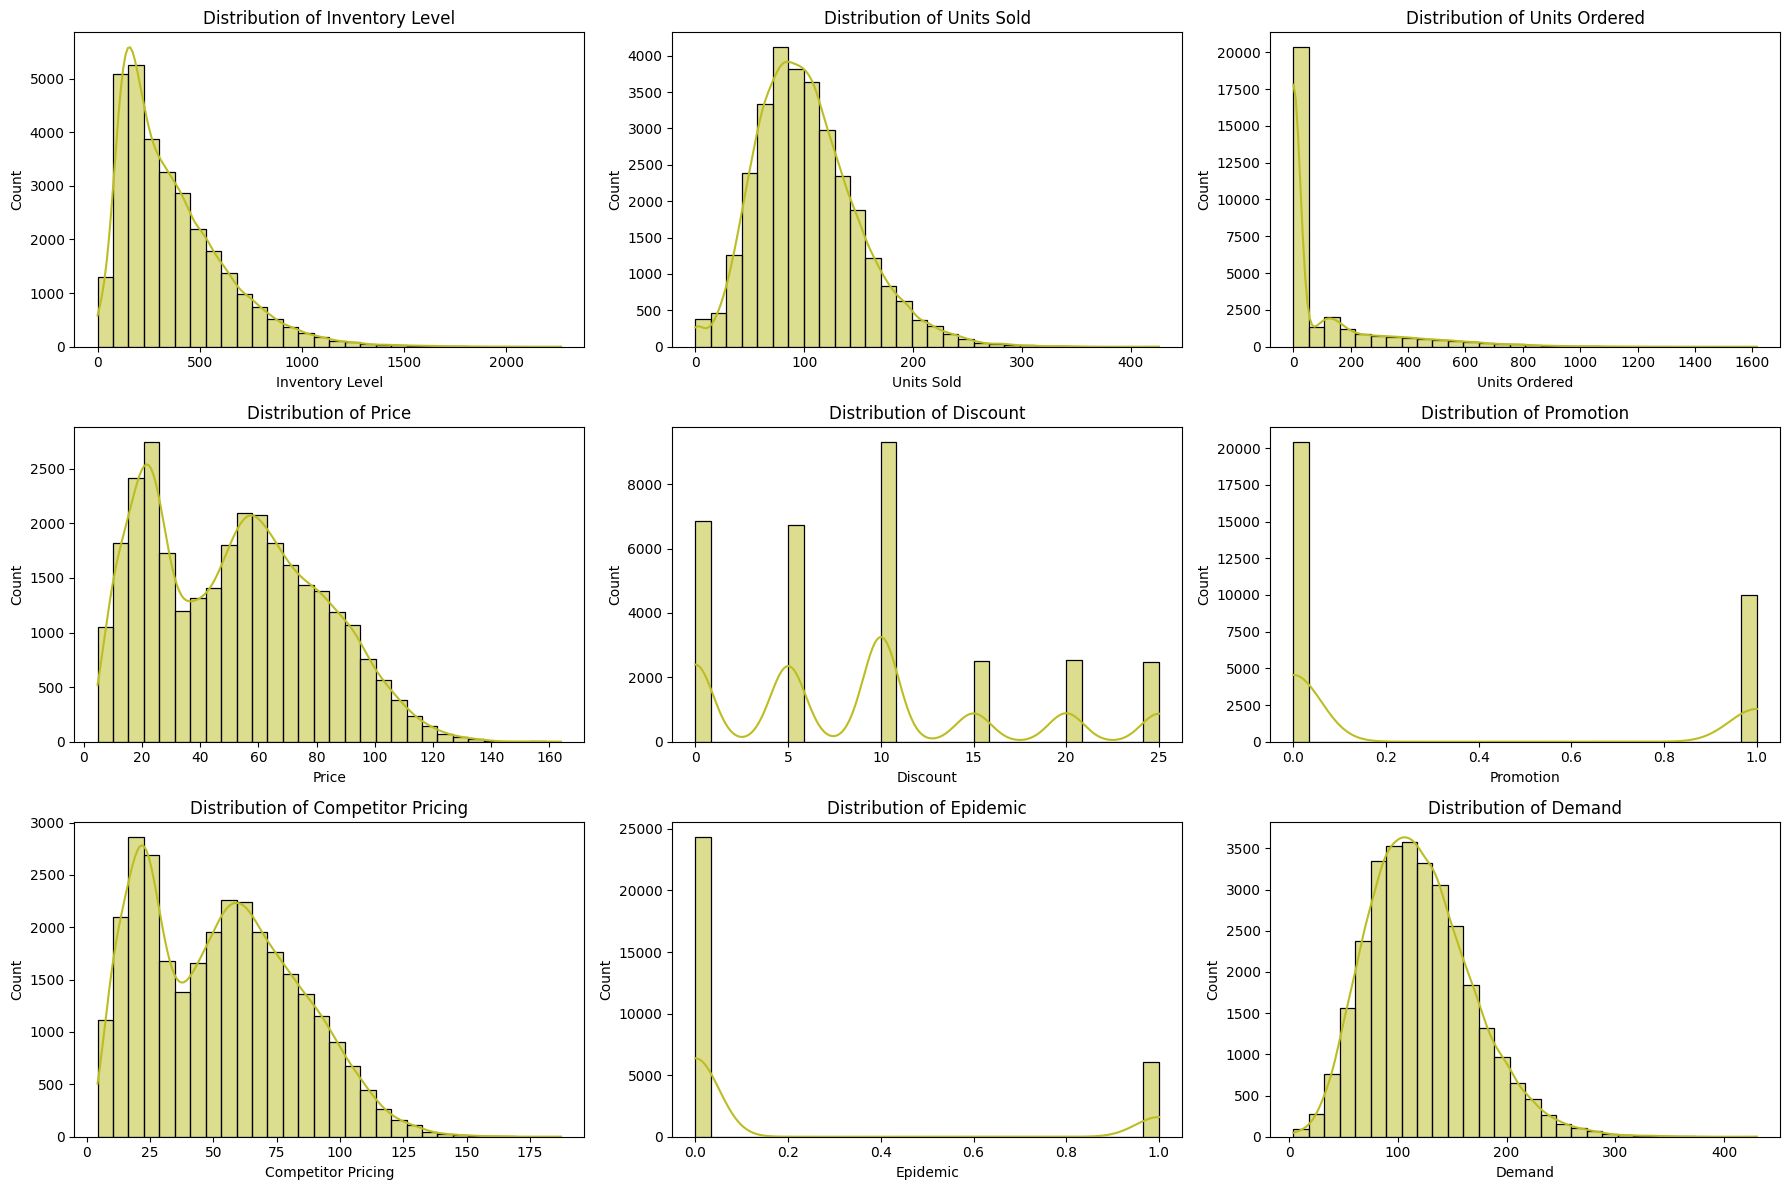

In [10]:
df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()
df_grocery['Date'] = pd.to_datetime(df_grocery['Date'])
df_grocery['YearMonth'] = df_grocery['Date'].dt.to_period('M')

numeric_cols = df_grocery.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df_grocery[col], bins=30, kde=True, ax=axes[idx],color='C8')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)



plt.tight_layout()
plt.show()


In [11]:



# Assume df_Groceries is already loaded with columns including 'Date', 'Demand', etc.
df = df_grocery.copy()

# Select all numeric features except the target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'Demand']

X = df[feature_cols].fillna(0)
y = df['Demand']

# Random train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("LinearRegression with random split:")
print(f"  MSE : {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R2  : {r2:.4f}")

LinearRegression with random split:
  MSE : 661.6353
  RMSE: 25.7223
  R2  : 0.7097


### **Normalization**

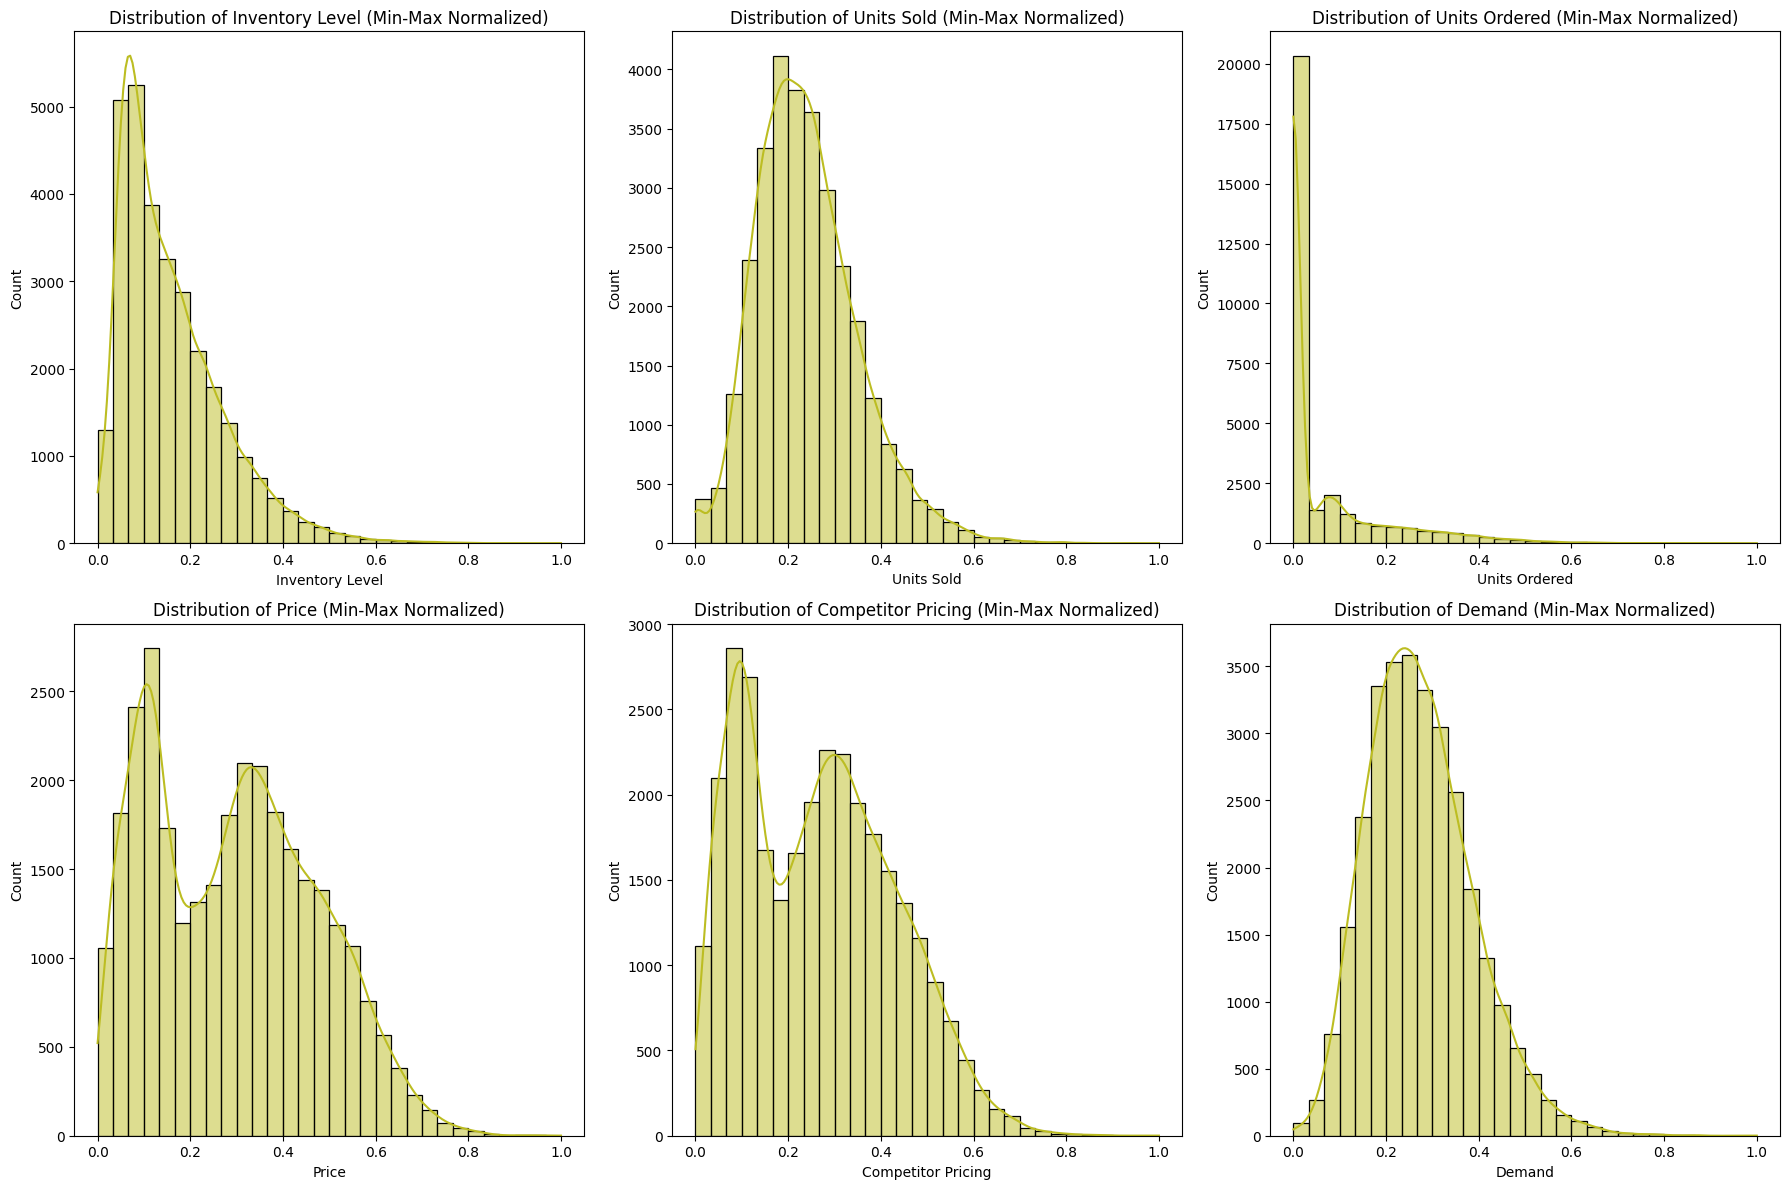

In [12]:

# 1. Filter for Groceries category and convert Date to datetime
df_grocery = df_raw[df_raw['Category'] == 'Groceries'].copy()
df_grocery['Date'] = pd.to_datetime(df_grocery['Date'])
df_grocery['YearMonth'] = df_grocery['Date'].dt.to_period('M')

# 2. Identify ordinal-like columns that should be treated as categorical
ordinal_cols = ['Promotion', 'Epidemic', 'Discount']

# 3. Split numeric vs. categorical features
#    - First, grab all int64/float64 columns
all_numeric = df_grocery.select_dtypes(include=['int64', 'float64']).columns.tolist()
#    - Exclude ordinal-like columns from true numeric list
numeric_cols = [col for col in all_numeric if col not in ordinal_cols]

#    - Categorical columns: object dtypes plus the ordinal-like ones
categorical_cols = df_grocery.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols += ordinal_cols

# 4. Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
df_grocery[numeric_cols] = scaler.fit_transform(df_grocery[numeric_cols])

# 5. Plot histograms for the normalized numeric features
n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(
        df_grocery[col],
        bins=30,
        kde=True,
        ax=axes[idx],
        color='C8'
    )
    axes[idx].set_title(f'Distribution of {col} (Min-Max Normalized)')
    axes[idx].set_xlabel(col)

# If there are any unused subplots, turn them off
for j in range(n, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


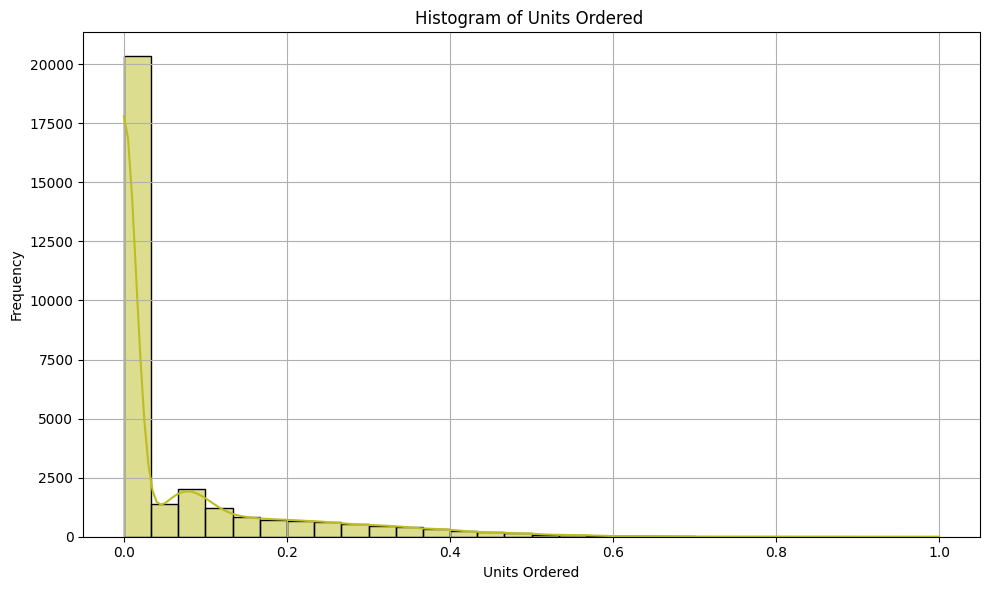

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(df_grocery['Units Ordered'], bins=30, kde=True,color='C8')
plt.title("Histogram of Units Ordered ")
plt.xlabel("Units Ordered")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


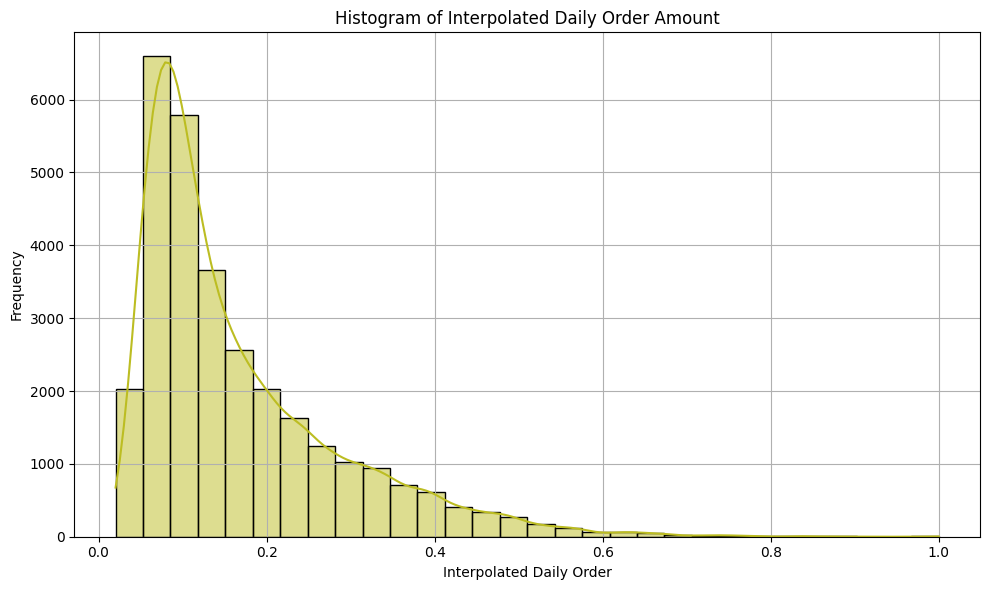

In [14]:


df_grocery['Date'] = pd.to_datetime(df_grocery['Date'])
df_grocery['YearMonth'] = df_grocery['Date'].dt.to_period('M')

# Sort by store-product-date
df_grocery = df_grocery.sort_values(by=['Store ID', 'Product ID', 'Date'])

# Get rows where order actually happened
df_orders = df_grocery[df_grocery['Units Ordered'] > 0].copy()
df_orders['Last_Order_Date'] = df_orders['Date']
df_orders['Last_Order_Amount'] = df_orders['Units Ordered']

# Merge last known order into main data
df_grocery = df_grocery.merge(
    df_orders[['Store ID', 'Product ID', 'Date', 'Last_Order_Date', 'Last_Order_Amount']],
    on=['Store ID', 'Product ID', 'Date'],
    how='left'
)

# Forward fill last order info within each group
df_grocery[['Last_Order_Date', 'Last_Order_Amount']] = df_grocery.groupby(['Store ID', 'Product ID'])[
    ['Last_Order_Date', 'Last_Order_Amount']
].ffill()

# Calculate number of days since last order
df_grocery['Days_Since_Last_Order'] = (df_grocery['Date'] - df_grocery['Last_Order_Date']).dt.days
df_grocery['Days_Since_Last_Order'] = df_grocery['Days_Since_Last_Order'].clip(lower=1)

# Compute interpolated average order
df_grocery['Interpolated_Order'] = df_grocery['Last_Order_Amount'] / df_grocery['Days_Since_Last_Order']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_grocery['Interpolated_Order'], bins=30, kde=True,color='C8')
plt.title("Histogram of Interpolated Daily Order Amount")
plt.xlabel("Interpolated Daily Order")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
type(df_grocery)


pandas.core.frame.DataFrame

In [16]:
df_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30400 entries, 0 to 30399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30400 non-null  datetime64[ns]
 1   Store ID               30400 non-null  object        
 2   Product ID             30400 non-null  object        
 3   Category               30400 non-null  object        
 4   Region                 30400 non-null  object        
 5   Inventory Level        30400 non-null  float64       
 6   Units Sold             30400 non-null  float64       
 7   Units Ordered          30400 non-null  float64       
 8   Price                  30400 non-null  float64       
 9   Discount               30400 non-null  int64         
 10  Weather Condition      30400 non-null  object        
 11  Promotion              30400 non-null  int64         
 12  Competitor Pricing     30400 non-null  float64       
 13  S

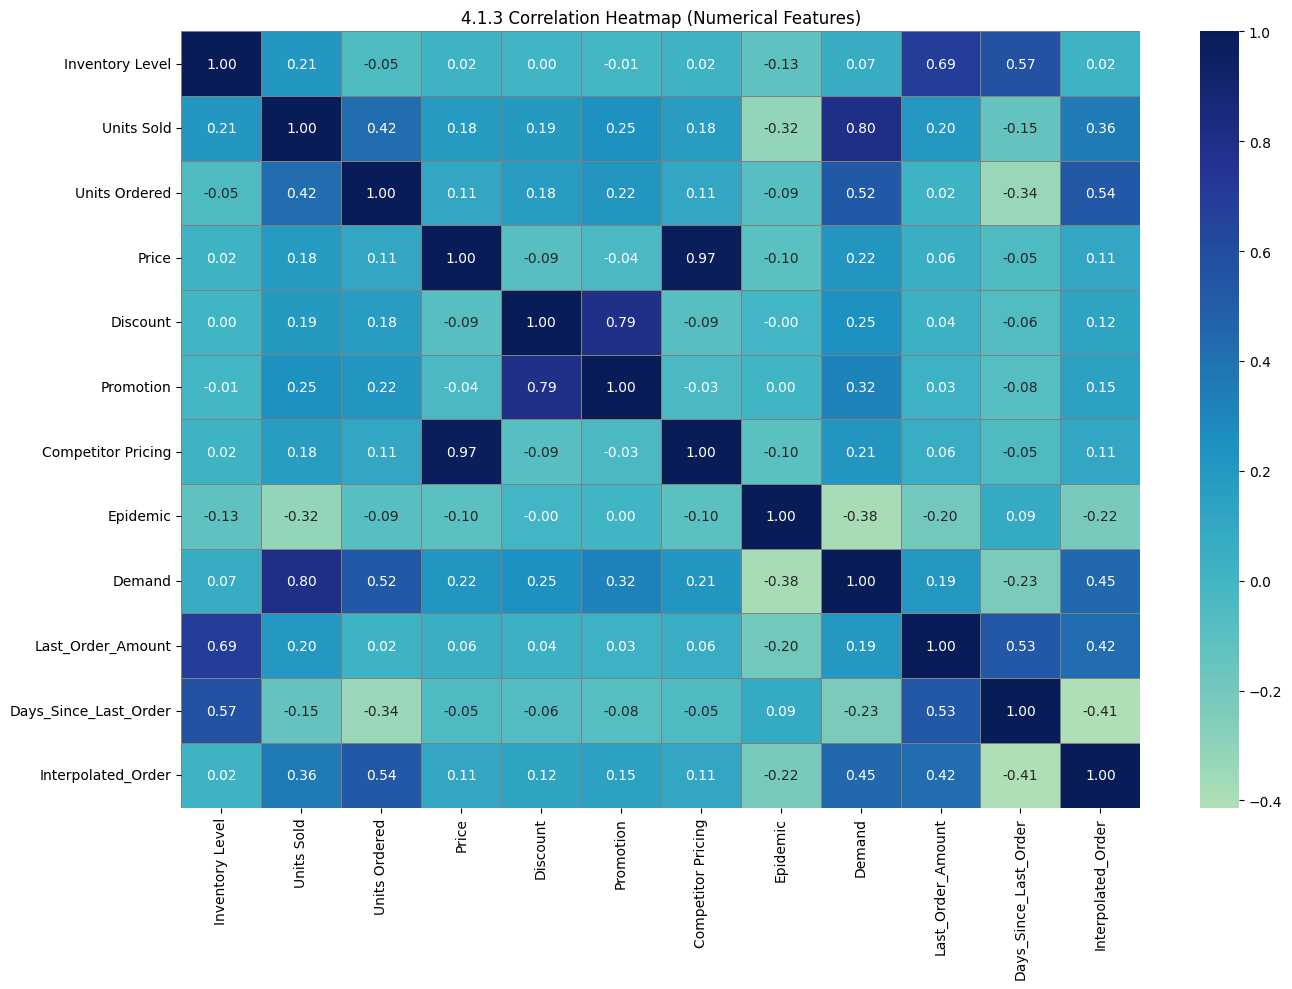

In [17]:



# Load dataset
df_Groceries=df_grocery.copy()
df = df_Groceries.copy()
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_cols].copy()

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("4.1.3 Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


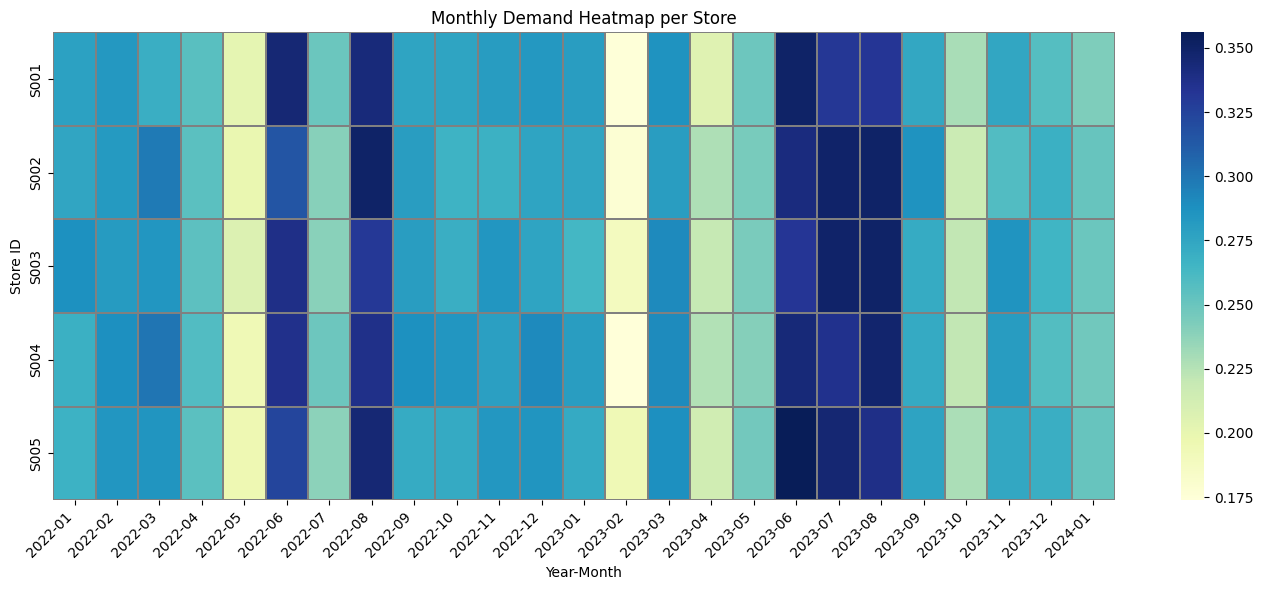

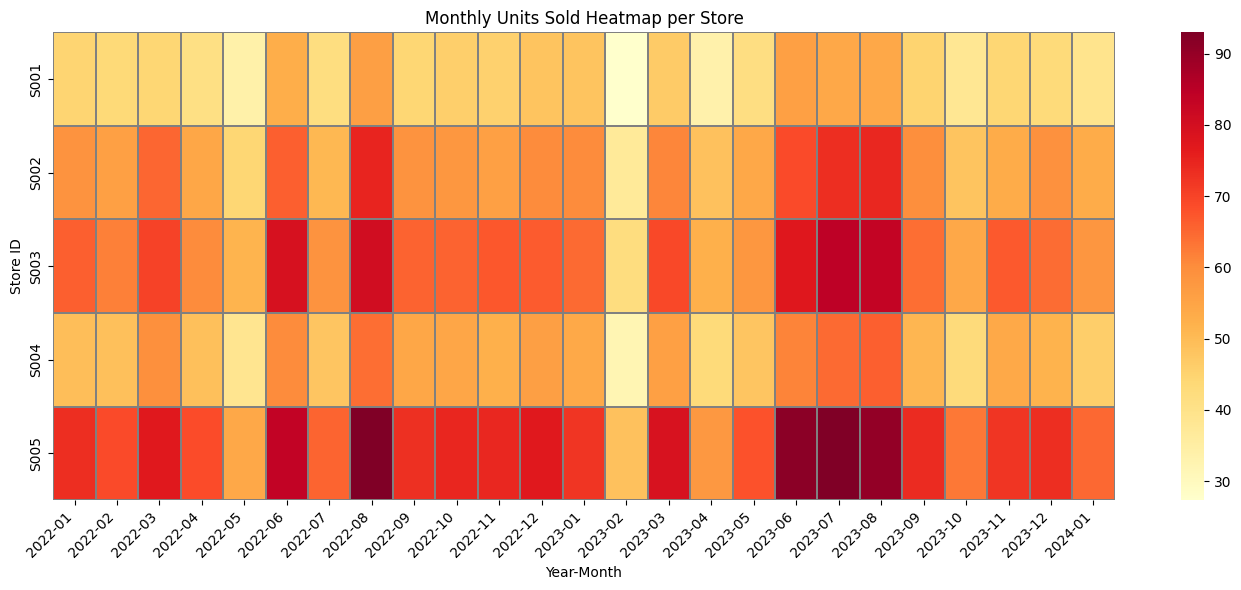

In [18]:

df_Groceries=df_grocery.copy()
df_Groceries['Date'] = pd.to_datetime(df_Groceries['Date'])
df_Groceries['YearMonth'] = df_Groceries['Date'].dt.to_period('M').astype(str)
df_Groceries['Year'] = df_Groceries['Date'].dt.year
df_Groceries['Month'] = df_Groceries['Date'].dt.month
df_Groceries['Week'] = df_Groceries['Date'].dt.isocalendar().week.astype(int)
df_Groceries['Day'] = df_Groceries['Date'].dt.day
df_Groceries['DayOfWeek'] = df_Groceries['Date'].dt.weekday + 1
df_Groceries['IsWeekend'] = df_Groceries['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)
df_Groceries['IsMonthStart'] = df_Groceries['Date'].dt.is_month_start.astype(int)
df_Groceries['IsMonthEnd'] = df_Groceries['Date'].dt.is_month_end.astype(int)
df_Groceries['IsQuarterStart'] = df_Groceries['Date'].dt.is_quarter_start.astype(int)
df_Groceries['IsQuarterEnd'] = df_Groceries['Date'].dt.is_quarter_end.astype(int)

pivot_demand_month = df_Groceries.pivot_table(
    index='Store ID',
    columns='YearMonth',
    values='Demand',
    aggfunc='mean',
    fill_value=0
)

pivot_sales_month = df_Groceries.pivot_table(
    index='Store ID',
    columns='YearMonth',
    values='Units Sold',
    aggfunc='sum',
    fill_value=0
)

pivot_promo_month = df_Groceries.pivot_table(
    index='Store ID',
    columns='YearMonth',
    values='Promotion',
    aggfunc='sum',
    fill_value=0
)

months = sorted(pivot_demand_month.columns)

pivot_demand_month = pivot_demand_month[months]
pivot_sales_month = pivot_sales_month[months]
pivot_promo_month = pivot_promo_month[months]

score_month = (pivot_demand_month + pivot_sales_month) / (1 + pivot_promo_month.clip(lower=0))

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_demand_month,
    cmap='YlGnBu',
    linewidths=0.2,
    linecolor='gray'
)
plt.title('Monthly Demand Heatmap per Store')
plt.xlabel('Year-Month')
plt.ylabel('Store ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_sales_month,
    cmap='YlOrRd',
    linewidths=0.2,
    linecolor='gray'
)
plt.title('Monthly Units Sold Heatmap per Store')
plt.xlabel('Year-Month')
plt.ylabel('Store ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

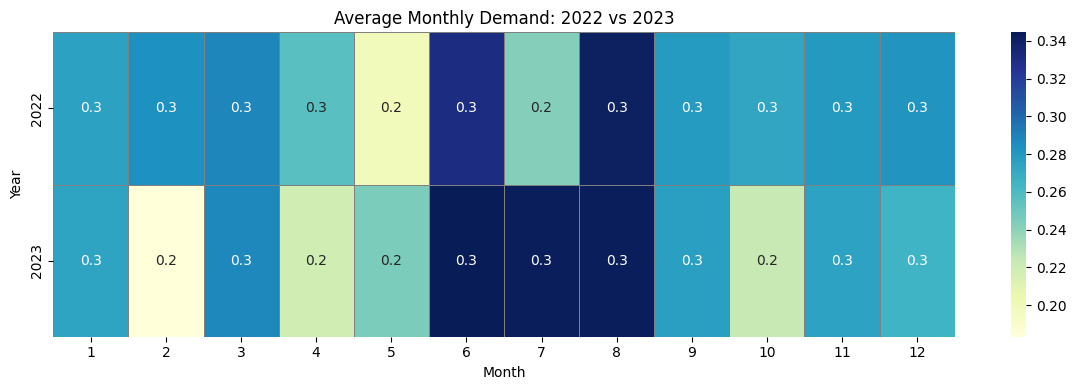

In [19]:


# Assume df_Groceries is defined with 'Date' parsed as datetime and 'Demand' column

# Filter for years 2022 and 2023
df_22_23 = df_Groceries[df_Groceries['Date'].dt.year.isin([2022, 2023])].copy()
df_22_23['Year'] = df_22_23['Date'].dt.year
df_22_23['Month'] = df_22_23['Date'].dt.month

# Compute average demand per month for each year
avg_demand = (
    df_22_23
    .groupby(['Year', 'Month'])['Demand']
    .mean()
    .reset_index()
)

# Pivot so that rows are Year and columns are Month
pivot_year_month = avg_demand.pivot(index='Year', columns='Month', values='Demand')

# Ensure months 1–12 appear for both years
pivot_year_month = pivot_year_month.reindex(index=[2022, 2023], columns=range(1, 13), fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    pivot_year_month,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".1f"
)
plt.title('Average Monthly Demand: 2022 vs 2023')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

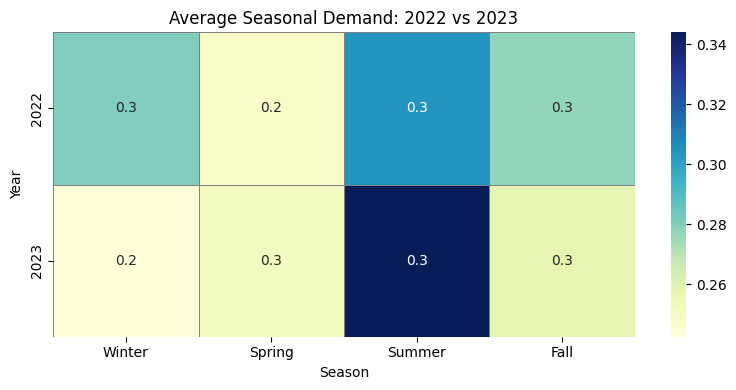

In [20]:


# Filter for years 2022 and 2023
df_22_23 = df_Groceries[df_Groceries['Date'].dt.year.isin([2022, 2023])].copy()
df_22_23['Year'] = df_22_23['Date'].dt.year
df_22_23['Month'] = df_22_23['Date'].dt.month

# Map month to season
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df_22_23['Season'] = df_22_23['Month'].map(season_map)

# Compute average demand per season and year
avg_season_demand = (
    df_22_23
    .groupby(['Year', 'Season'])['Demand']
    .mean()
    .reset_index()
)

# Pivot so rows are Year and columns are Season
pivot_season = avg_season_demand.pivot(index='Year', columns='Season', values='Demand')

# Ensure consistent season order
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
pivot_season = pivot_season.reindex(columns=seasons_order)

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    pivot_season,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".1f"
)
plt.title('Average Seasonal Demand: 2022 vs 2023')
plt.xlabel('Season')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

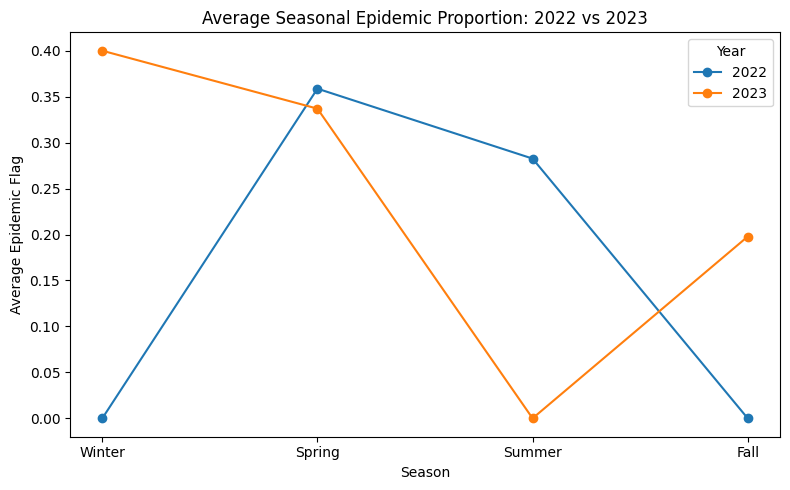

In [21]:

# Assume df_Groceries with 'Date' and 'Epidemic' columns

# Filter for years 2022 and 2023
df_22_23 = df_Groceries[df_Groceries['Date'].dt.year.isin([2022, 2023])].copy()
df_22_23['Year'] = df_22_23['Date'].dt.year
df_22_23['Month'] = df_22_23['Date'].dt.month

# Map month to season
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df_22_23['Season'] = df_22_23['Month'].map(season_map)

# Compute average Epidemic flag per season for each year
avg_season_epidemic = (
    df_22_23
    .groupby(['Year', 'Season'])['Epidemic']
    .mean()
    .reset_index()
)

# Pivot so rows are Year, columns are Season
pivot_epidemic = avg_season_epidemic.pivot(index='Year', columns='Season', values='Epidemic')
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
pivot_epidemic = pivot_epidemic.reindex(index=[2022, 2023], columns=seasons_order)

# Plot two line plots: one for 2022, one for 2023
plt.figure(figsize=(8, 5))
for year in [2022, 2023]:
    plt.plot(
        seasons_order,
        pivot_epidemic.loc[year, seasons_order],
        marker='o',
        label=str(year)
    )

plt.title('Average Seasonal Epidemic Proportion: 2022 vs 2023')
plt.xlabel('Season')
plt.ylabel('Average Epidemic Flag')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

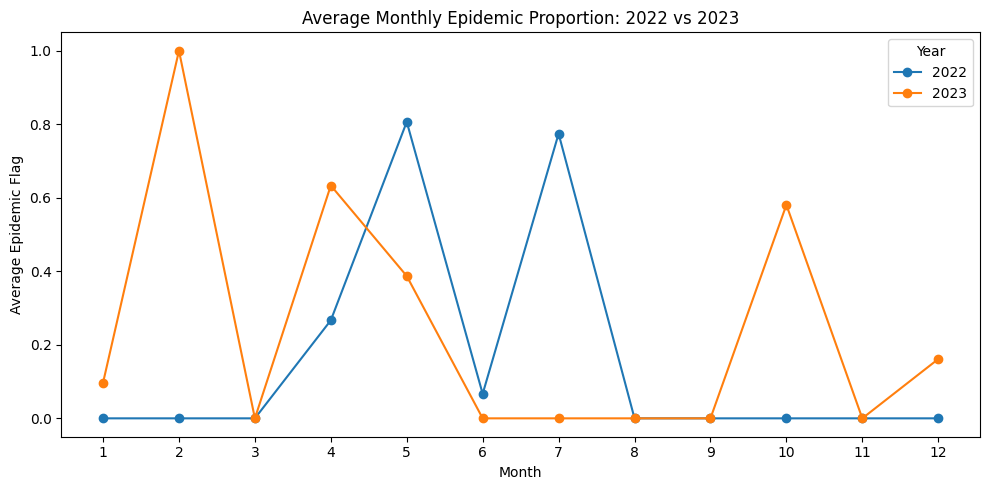

In [22]:


# Filter for years 2022 and 2023
df_22_23 = df_Groceries[df_Groceries['Date'].dt.year.isin([2022, 2023])].copy()
df_22_23['Year'] = df_22_23['Date'].dt.year
df_22_23['Month'] = df_22_23['Date'].dt.month

# Compute average Epidemic flag per month for each year
avg_month_epidemic = (
    df_22_23
    .groupby(['Year', 'Month'])['Epidemic']
    .mean()
    .reset_index()
)

# Pivot so rows are Year, columns are Month
pivot_epidemic_month = avg_month_epidemic.pivot(index='Year', columns='Month', values='Epidemic')
pivot_epidemic_month = pivot_epidemic_month.reindex(index=[2022, 2023], columns=range(1, 13), fill_value=0)

# Plot line plots for 2022 and 2023
plt.figure(figsize=(10, 5))
for year in [2022, 2023]:
    plt.plot(
        pivot_epidemic_month.columns,
        pivot_epidemic_month.loc[year],
        marker='o',
        label=str(year)
    )

plt.title('Average Monthly Epidemic Proportion: 2022 vs 2023')
plt.xlabel('Month')
plt.ylabel('Average Epidemic Flag')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()


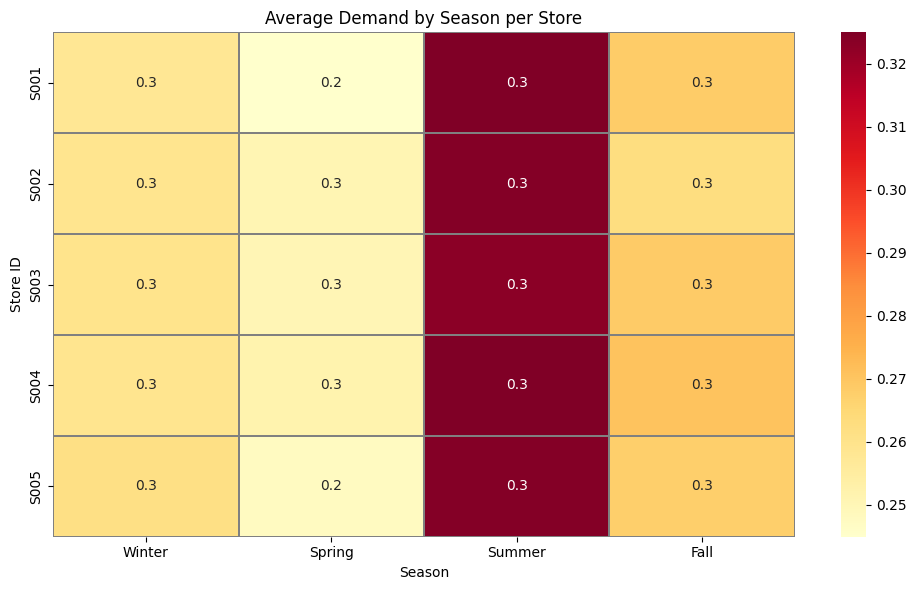

In [23]:


# Assume df_Groceries is already defined with Date parsed and Month column

df_Groceries['Season'] = df_Groceries['Month'].map({
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
})

pivot_demand_season = df_Groceries.pivot_table(
    index='Store ID',
    columns='Season',
    values='Demand',
    aggfunc='mean',
    fill_value=0
)

seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
pivot_demand_season = pivot_demand_season.reindex(columns=seasons_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_demand_season,
    cmap='YlOrRd',
    linewidths=0.2,
    linecolor='gray',
    annot=True,
    fmt=".1f"
)
plt.title('Average Demand by Season per Store')
plt.xlabel('Season')
plt.ylabel('Store ID')
plt.tight_layout()
plt.show()

In [24]:
df_Groceries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30400 entries, 0 to 30399
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30400 non-null  datetime64[ns]
 1   Store ID               30400 non-null  object        
 2   Product ID             30400 non-null  object        
 3   Category               30400 non-null  object        
 4   Region                 30400 non-null  object        
 5   Inventory Level        30400 non-null  float64       
 6   Units Sold             30400 non-null  float64       
 7   Units Ordered          30400 non-null  float64       
 8   Price                  30400 non-null  float64       
 9   Discount               30400 non-null  int64         
 10  Weather Condition      30400 non-null  object        
 11  Promotion              30400 non-null  int64         
 12  Competitor Pricing     30400 non-null  float64       
 13  S

### **FEATURE IMPORTANCE**

In [25]:


# Load dataset and filter for groceries
df_Groceries
df = df[df['Category'] == 'Groceries'].copy()

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Train/test split
train_mask = df['Date'] < '2023-01-01'
test_mask = df['Date'] >= '2023-01-01'

# Select numeric columns except target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
top_features = [col for col in numeric_cols if col != 'Demand']

# Prepare train/test data
X_train = df.loc[train_mask, top_features].fillna(0)
X_test  = df.loc[test_mask, top_features].fillna(0)
y_train = df.loc[train_mask, 'Demand']
y_test  = df.loc[test_mask, 'Demand']

# Train model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': top_features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(feature_importances)


Model Evaluation:
MSE : 0.0022
RMSE: 0.0472
R²  : 0.8325

Top Features:
                  Feature  Importance
1              Units Sold    0.676391
0         Inventory Level    0.090294
2           Units Ordered    0.064295
10     Interpolated_Order    0.041413
3                   Price    0.034900
8       Last_Order_Amount    0.031805
6      Competitor Pricing    0.027751
4                Discount    0.012763
7                Epidemic    0.009425
5               Promotion    0.008180
9   Days_Since_Last_Order    0.002783


### **FEATURE SETS**

In [26]:
#selcted top features
features_Set01 =['Units Sold',
 'Inventory Level',
 'Units Ordered',
 'Interpolated_Order',
 'Price',
 'Competitor Pricing',
 'Discount',
 ]
#selsected top orginal features
features_Set02 = ['Units Sold',
 'Inventory Level',
 'Units Ordered',
 'Price',
 'Competitor Pricing',
 'Discount',
 'Epidemic',
 'Promotion',]
 #All top
features_Set03 = ['Units Sold',
 'Inventory Level',
 'Units Ordered',
 'Interpolated_Order',
 'Price',
 'Competitor Pricing',
 'Day',
 'Week',
 'Discount',
 'Epidemic',
 'DayOfWeek',
 'Promotion',
 'Month',
 'Days_Since_Last_Order',
 'IsWeekend',
 'IsMonthStart',
 'IsMonthEnd',
 'IsQuarterStart',
 'IsQuarterEnd',
 'Year',]
 #All
features_Set04 = [
    'Inventory Level',
    'Units Sold',
    'Units Ordered',
    'Price',
    'Discount',
    'Promotion',
    'Competitor Pricing',
    'Epidemic',
    'Last_Order_Amount',
    'Days_Since_Last_Order',
    'Interpolated_Order',
    'Year',
    'Month',
    'Week',
    'Day',
    'DayOfWeek',
    'IsWeekend',
    'IsMonthStart',
    'IsMonthEnd',
    'IsQuarterStart',
    'IsQuarterEnd',
]
features_Set0 = [
    'Units Sold',
    'Inventory Level',
    'Units Ordered',
    'Price',
    'Competitor Pricing',
    'Discount',
    'Epidemic',
    'Promotion',
]

### **LINEAR REGRESSION**

In [27]:


# assume df_Groceries is already loaded
df = df_Groceries.copy()

# define a single feature set as a list

features = features_Set04

def random_split_evaluation(df, features, target='Demand',
                            test_size=0.2, random_state=42):
    """
    Train/test split randomly (e.g. 80/20) using the given features.
    Returns MSE, RMSE, R2.
    """
    X = df[features].fillna(0)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)
    return mse, rmse, r2

def kfold_cv_evaluation(df, features, target='Demand',
                        n_splits=5, random_state=42):
    """
    5-Fold cross-validation (shuffle=True). Returns average RMSE and average R2.
    """
    X = df[features].fillna(0)
    y = df[target]
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    rmses = []
    r2s   = []
    for train_idx, test_idx in kf.split(X):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
        model = LinearRegression()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        rmses.append(np.sqrt(mean_squared_error(y_te, y_pred)))
        r2s.append(r2_score(y_te, y_pred))
    return np.mean(rmses), np.mean(r2s)

def time_based_split_evaluation(df, features, target='Demand',
                                date_col='Date', cutoff='2023-01-01'):
    """
    Time-based split at the given cutoff date.
    Returns MSE, RMSE, R2.
    """
    df2 = df.copy()
    df2[date_col] = pd.to_datetime(df2[date_col])
    train_df = df2[df2[date_col] < cutoff]
    test_df  = df2[df2[date_col] >= cutoff]

    X_tr = train_df[features].fillna(0)
    y_tr = train_df[target]
    X_te = test_df[features].fillna(0)
    y_te = test_df[target]

    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    mse  = mean_squared_error(y_te, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_te, y_pred)
    return mse, rmse, r2

# ---- run evaluations ----

# 1) Random 80/20 split
mse_rand, rmse_rand, r2_rand = random_split_evaluation(df, features)
print("Random 80/20 split:")
print(f"  MSE : {mse_rand:.4f}")
print(f"  RMSE: {rmse_rand:.4f}")
print(f"  R2  : {r2_rand:.4f}")

# 2) 5-Fold CV (avg)
rmse_cv, r2_cv = kfold_cv_evaluation(df, features)
print("\n5-Fold CV (avg):")
print(f"  RMSE_avg: {rmse_cv:.4f}")
print(f"  R2_avg  : {r2_cv:.4f}")

# 3) Time-based split at 2023-01-01
mse_time, rmse_time, r2_time = time_based_split_evaluation(df, features)
print("\nTime-based split at 2023-01-01:")
print(f"  MSE : {mse_time:.4f}")
print(f"  RMSE: {rmse_time:.4f}")
print(f"  R2  : {r2_time:.4f}")


Random 80/20 split:
  MSE : 0.0033
  RMSE: 0.0579
  R2  : 0.7392

5-Fold CV (avg):
  RMSE_avg: 0.0586
  R2_avg  : 0.7338

Time-based split at 2023-01-01:
  MSE : 0.0034
  RMSE: 0.0582
  R2  : 0.7449


###**RANDOM FOREST**

In [28]:


# Load your data
# df = df_Groceries.copy()
df['Date'] = pd.to_datetime(df['Date'])

# Define your feature set

features = features_Set0

# 1) Random 80/20 split
X = df[features].fillna(0)
y = df['Demand']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_rand = RandomForestRegressor(random_state=42)
rf_rand.fit(X_train, y_train)
y_pred_rand = rf_rand.predict(X_test)
mse_rand  = mean_squared_error(y_test, y_pred_rand)
rmse_rand = np.sqrt(mse_rand)
r2_rand   = r2_score(y_test, y_pred_rand)

print("Random 80/20 Split:")
print(f"  MSE : {mse_rand:.4f}")
print(f"  RMSE: {rmse_rand:.4f}")
print(f"  R²  : {r2_rand:.4f}\n")

# 2) 5-Fold CV (avg)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses, r2s = [], []
for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    rf_cv = RandomForestRegressor(random_state=42)
    rf_cv.fit(X_tr, y_tr)
    y_pred_cv = rf_cv.predict(X_te)
    rmses.append(np.sqrt(mean_squared_error(y_te, y_pred_cv)))
    r2s.append(r2_score(y_te, y_pred_cv))

print("5-Fold CV (avg):")
print(f"  RMSE_avg: {np.mean(rmses):.4f}")
print(f"  R2_avg  : {np.mean(r2s):.4f}\n")

# 3) Time-based split at 2023-01-01
train_mask = df['Date'] < '2023-01-01'
test_mask  = df['Date'] >= '2023-01-01'
X_tr_time = df.loc[train_mask, features].fillna(0)
y_tr_time = df.loc[train_mask, 'Demand']
X_te_time = df.loc[test_mask, features].fillna(0)
y_te_time = df.loc[test_mask, 'Demand']

rf_time = RandomForestRegressor(random_state=42)
rf_time.fit(X_tr_time, y_tr_time)
y_pred_time = rf_time.predict(X_te_time)
mse_time  = mean_squared_error(y_te_time, y_pred_time)
rmse_time = np.sqrt(mse_time)
r2_time   = r2_score(y_te_time, y_pred_time)

print("Time-Based Split at 2023-01-01:")
print(f"  MSE : {mse_time:.4f}")
print(f"  RMSE: {rmse_time:.4f}")
print(f"  R²  : {r2_time:.4f}")


Random 80/20 Split:
  MSE : 0.0023
  RMSE: 0.0475
  R²  : 0.8239

5-Fold CV (avg):
  RMSE_avg: 0.0475
  R2_avg  : 0.8252

Time-Based Split at 2023-01-01:
  MSE : 0.0023
  RMSE: 0.0479
  R²  : 0.8273


### **RandomForestRegressor**

In [29]:

# Load dataset and filter for groceries
df = df_Groceries.copy()

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Train/test split based on time
train_mask = df['Date'] < '2023-01-01'
test_mask  = df['Date'] >= '2023-01-01'

# Select numeric columns except the target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
top_features = [col for col in numeric_cols if col != 'Demand']

# Prepare train/test data
X_train = df.loc[train_mask, top_features].fillna(0)
X_test  = df.loc[test_mask,  top_features].fillna(0)
y_train = df.loc[train_mask, 'Demand']
y_test  = df.loc[test_mask,  'Demand']

# Train model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
mse   = mean_squared_error(y_test,  y_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test,        y_pred)

print("Model Evaluation:")
print(f"  MSE : {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²  : {r2:.4f}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature':    top_features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(feature_importances)


Model Evaluation:
  MSE : 0.0022
  RMSE: 0.0470
  R²  : 0.8336

Top Features:
                  Feature  Importance
1              Units Sold    0.671098
0         Inventory Level    0.083027
2           Units Ordered    0.062520
10     Interpolated_Order    0.035050
3                   Price    0.026234
8       Last_Order_Amount    0.025802
6      Competitor Pricing    0.020293
14                    Day    0.016140
13                   Week    0.014069
4                Discount    0.010002
7                Epidemic    0.008888
15              DayOfWeek    0.008847
5               Promotion    0.007568
12                  Month    0.005837
9   Days_Since_Last_Order    0.002287
16              IsWeekend    0.001288
17           IsMonthStart    0.000386
18             IsMonthEnd    0.000298
19         IsQuarterStart    0.000242
20           IsQuarterEnd    0.000123
11                   Year    0.000000


In [30]:


# Assume df_Groceries is already loaded with the columns listed

df = df_Groceries.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# One-hot encode categorical columns
categorical_cols = [
    'Store ID', 'Product ID', 'Category', 'Region',
    'Weather Condition', 'Seasonality', 'Season'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Manually specify numeric/date-derived features
feature_cols = features_Set02

# Add one-hot columns for the encoded categoricals
dummy_cols = [col for col in df.columns
              if any(col.startswith(prefix + '_') for prefix in categorical_cols)]
feature_cols += dummy_cols

X = df[feature_cols].fillna(0)
y = df['Demand']

tscv = TimeSeriesSplit(n_splits=5)
xgb = XGBRegressor(random_state=42, n_estimators=100)

scores = cross_val_score(xgb, X, y, cv=tscv, scoring='r2', n_jobs=-1)
print("TimeSeriesSplit R2 scores:", scores)
print("Mean R2:", np.mean(scores))

TimeSeriesSplit R2 scores: [0.85682183 0.86504375 0.89860028 0.88112128 0.90403618]
Mean R2: 0.8811246617673923


### **HYPERPARAMETER**

In [31]:


xgb_0 = XGBRegressor(
    random_state=42,
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_1 = XGBRegressor(
    random_state=0,
    n_estimators=50,
    learning_rate=0.01,
    max_depth=4,
    subsample=1.0,
    colsample_bytree=1.0
)

xgb_2 = XGBRegressor(
    random_state=7,
    n_estimators=150,
    learning_rate=0.10,
    max_depth=8,
    subsample=0.6,
    colsample_bytree=0.7
)

xgb_3 = XGBRegressor(
    random_state=99,
    n_estimators=200,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.5
)


### **XGBRegressor**

In [32]:


# Assume df_Groceries is already loaded
df = df_Groceries.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# One-hot encode categoricals
categorical_cols = [
    'Store ID', 'Product ID', 'Category', 'Region',
    'Weather Condition', 'Seasonality', 'Season'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Base feature set (from features_Set04), dropping any leakage

feature_cols = features_Set04.copy()

# Add one-hot dummies
dummy_cols = [
    c for c in df.columns
    if any(c.startswith(pref + '_') for pref in categorical_cols)
]
feature_cols += dummy_cols

# Prepare data
X = df[feature_cols].fillna(0)
y = df['Demand']

# 5-fold time‐series split
tscv = TimeSeriesSplit(n_splits=5)

# Instantiate XGBRegressor with hyperparameters inline
xgb = xgb_0

# Cross‐validate
scores = cross_val_score(xgb, X, y, cv=tscv, scoring='r2', n_jobs=-1)

print("TimeSeriesSplit R² scores:", scores)
print("Mean R²:", np.mean(scores))


TimeSeriesSplit R² scores: [0.79592628 0.81085259 0.84855667 0.8189962  0.85208669]
Mean R²: 0.8252836852786534


### **ERROR TABLE**

In [33]:

df_error = df.loc[X_test.index].copy()
df_error['Predicted'] = y_pred
df_error['Error'] = df_error['Demand'] - df_error['Predicted']
df_error.sort_values('Error', ascending=False).head(10)


,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Season_Spring,Season_Summer,Season_Winter,Predicted,Error
27143,2023-06-28,0.100132,0.532864,0.302599,0.666374,20,1,0.559491,0,1.000000,...,False,True,False,True,False,False,True,False,0.527653,0.472347
18842,2023-08-26,0.130569,0.556338,0.459158,0.161193,25,1,0.138438,0,0.859155,...,False,True,False,True,False,False,True,False,0.528333,0.330822
29406,2023-06-11,0.040582,0.215962,0.681312,0.676923,20,1,0.520850,0,0.784038,...,False,True,False,True,False,False,True,False,0.473592,0.310446
4319,2023-06-04,0.079400,0.422535,0.220916,0.507190,20,1,0.538613,0,0.760563,...,False,True,False,True,False,False,True,False,0.461526,0.299038
17289,2023-07-24,0.067931,0.361502,0.235149,0.431460,25,1,0.445264,0,0.772300,...,False,False,False,True,False,False,True,False,0.482113,0.290188
20347,2023-08-11,0.073666,0.392019,0.308168,0.318932,15,1,0.255014,0,0.715962,...,False,True,False,True,False,False,True,False,0.435469,0.280493
6610,2023-06-15,0.435377,0.619718,0.748144,0.359498,20,1,0.364103,0,0.814554,...,False,True,False,True,False,False,True,False,0.536479,0.278075
4380,2023-08-04,0.044552,0.237089,0.192450,0.501162,20,1,0.532273,0,0.746479,...,False,True,False,True,False,False,True,False,0.468991,0.277488
20348,2023-08-12,0.192766,0.460094,0.000000,0.271586,25,1,0.211128,0,0.692488,...,False,True,False,True,False,False,True,False,0.418404,0.274085
7375,2023-06-20,0.117777,0.551643,0.243193,0.196295,25,1,0.157294,0,0.765258,...,False,True,False,True,False,False,True,False,0.492676,0.272582


### **ERROR HEATMAP**

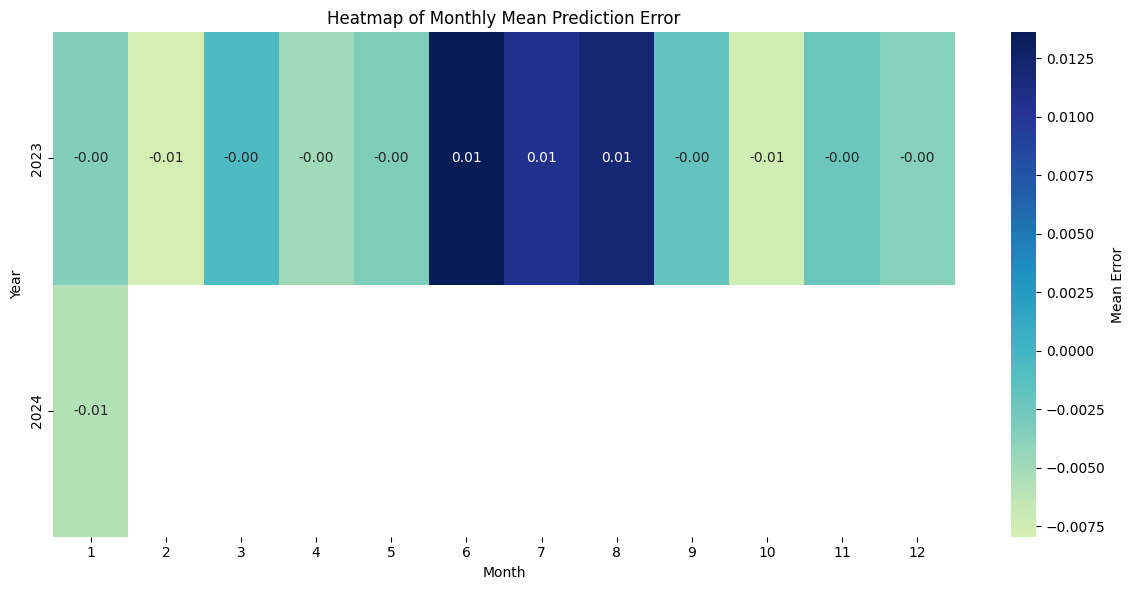

In [34]:


df_error = pd.DataFrame({
    'True':       y_test,
    'Predicted':  y_pred
})
# bring in the Date column from your original df (indexed the same as X_test)
df_error = df_error.join(df[['Date']], how='left')

# 2) Compute error
df_error['Error'] = df_error['True'] - df_error['Predicted']

# 3) Extract Year and Month
df_error['Year']  = df_error['Date'].dt.year
df_error['Month'] = df_error['Date'].dt.month

# 4) Pivot to get mean error by Year/Month
error_pivot = df_error.pivot_table(
    index='Year',
    columns='Month',
    values='Error',
    aggfunc='mean'
)

# 5) Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    error_pivot,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    center=0,
    cbar_kws={'label': 'Mean Error'}
)
plt.title("Heatmap of Monthly Mean Prediction Error")
plt.ylabel("Year")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

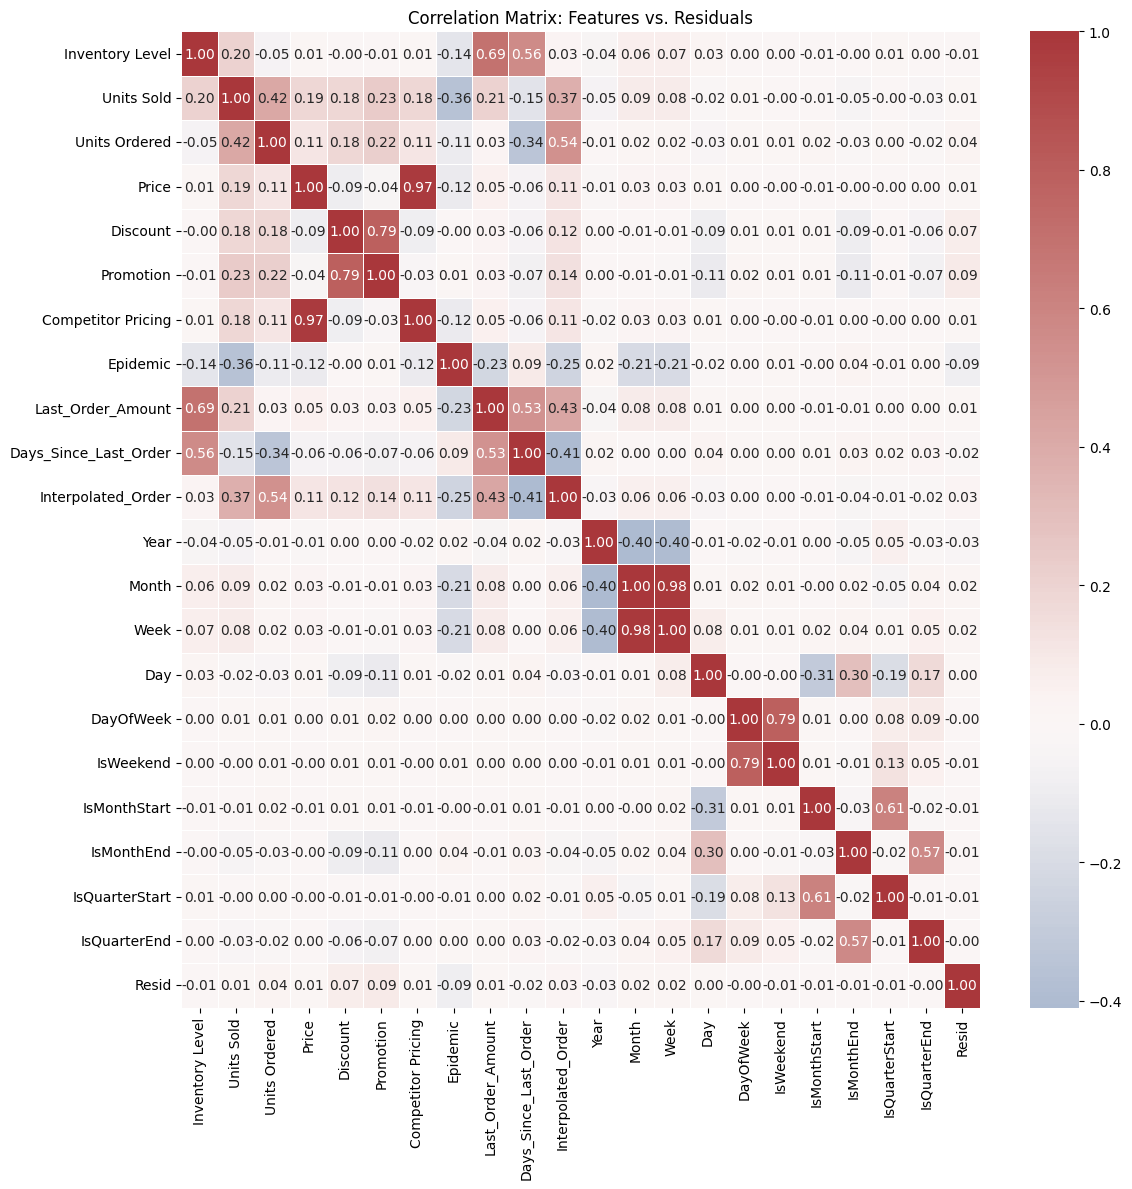

In [35]:


# 1) Build a residuals DataFrame
df_err = X_test.copy()
df_err['True']   = y_test
df_err['Pred']   = y_pred
df_err['Resid']  = df_err['True'] - df_err['Pred']
df_err['AbsErr'] = df_err['Resid'].abs()

# 2) Pick the numeric columns you want to inspect
#    (for example, all floats/ints except target)
num_cols = X_test.select_dtypes(include=[np.number]).columns.tolist()

# 3) Compute corr‐matrix between features and Resid
corr = df_err[num_cols + ['Resid']].corr()

# 4) Plot the square heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix: Features vs. Residuals")
plt.tight_layout()
plt.show()


In [36]:
df = df_Groceries.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30400 entries, 0 to 30399
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30400 non-null  datetime64[ns]
 1   Store ID               30400 non-null  object        
 2   Product ID             30400 non-null  object        
 3   Category               30400 non-null  object        
 4   Region                 30400 non-null  object        
 5   Inventory Level        30400 non-null  float64       
 6   Units Sold             30400 non-null  float64       
 7   Units Ordered          30400 non-null  float64       
 8   Price                  30400 non-null  float64       
 9   Discount               30400 non-null  int64         
 10  Weather Condition      30400 non-null  object        
 11  Promotion              30400 non-null  int64         
 12  Competitor Pricing     30400 non-null  float64       
 13  S

### **CALENDAR**

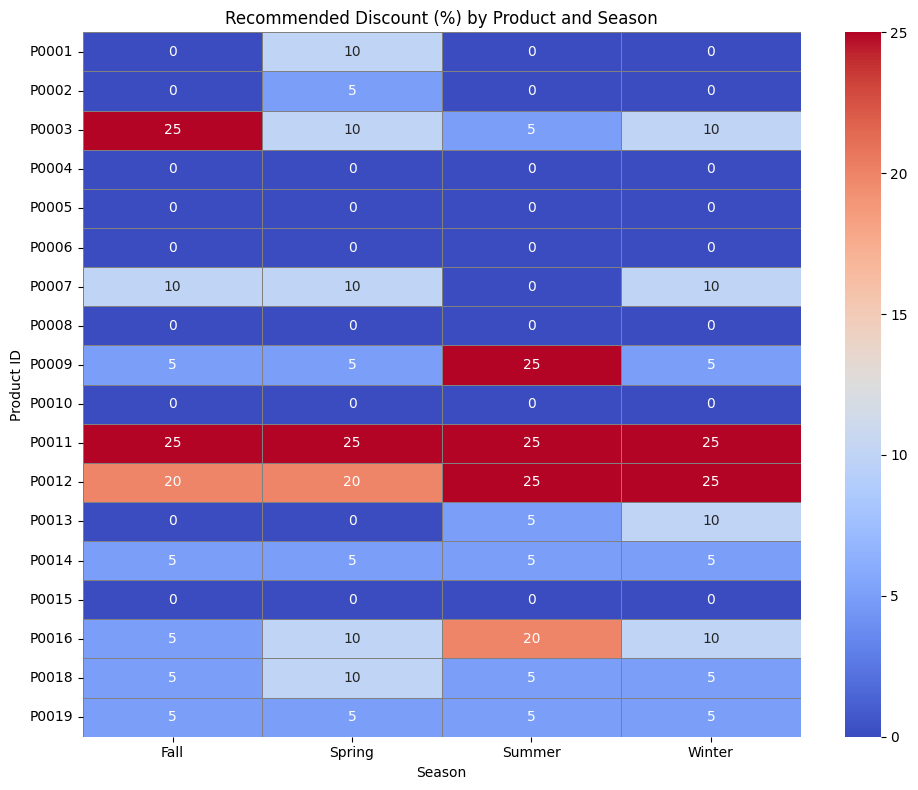

In [37]:


# Assume df_Groceries is already loaded with all required columns

df = df_Groceries.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['Season'] = df['Month'].map(season_map)

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())
df['Is_Holiday'] = df['Date'].isin(holidays).astype(int)

categorical_cols = [
    'Store ID', 'Product ID', 'Category', 'Region',
    'Weather Condition', 'Seasonality', 'Season'
]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

feature_cols = [
    'Inventory Level',
    'Units Sold',
    'Units Ordered',
    'Price',
    'Discount',
    'Promotion',
    'Epidemic',
    'Is_Holiday'
]
dummy_cols = [c for c in df.columns if any(c.startswith(prefix + '_') for prefix in categorical_cols)]
feature_cols += dummy_cols

# Train XGBRegressor on the full dataset
X_full = df[feature_cols].fillna(0)
y_full = df['Demand']
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_full, y_full)

# Build recommendation records
products = df_Groceries['Product ID'].unique()
seasons = df_Groceries['Month'].map(season_map).unique()
discount_levels = sorted(df_Groceries['Discount'].unique())

records = []
for pid in products:
    for season in seasons:
        subset = df_Groceries[(df_Groceries['Product ID'] == pid) & (df_Groceries['Season'] == season)]
        if subset.empty:
            continue
        base = subset.median(numeric_only=True).to_dict()
        price = float(subset['Price'].median())
        for disc in discount_levels:
            feat = {col: 0 for col in feature_cols}
            # Fill base numeric features
            for k, v in base.items():
                if k in feat:
                    feat[k] = v
            # Override Discount
            feat['Discount'] = disc
            # Turn on the one-hot flag for this product and this season
            prod_col = f"Product ID_{pid}"
            if prod_col in feat:
                feat[prod_col] = 1
            season_col = f"Season_{season}"
            if season_col in feat:
                feat[season_col] = 1
            X_scenario = pd.DataFrame([feat])
            pred_demand = xgb.predict(X_scenario)[0]
            revenue = pred_demand * price * (1 - disc / 100.0)
            records.append({
                'Product ID': pid,
                'Season': season,
                'Discount': disc,
                'Predicted_Demand': pred_demand,
                'Price': price,
                'Estimated_Revenue': revenue
            })

rec_df = pd.DataFrame(records)
idx = rec_df.groupby(['Product ID', 'Season'])['Estimated_Revenue'].idxmax()
recommendations = rec_df.loc[idx, ['Product ID', 'Season', 'Discount', 'Predicted_Demand', 'Price', 'Estimated_Revenue']].reset_index(drop=True)

# Pivot so rows=Product ID, columns=Season, values=Discount
pivot_reco = recommendations.pivot(index='Product ID', columns='Season', values='Discount')

# Plot heatmap of recommended discount by product and season
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_reco,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".0f"
)
plt.title('Recommended Discount (%) by Product and Season')
plt.xlabel('Season')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()

In [38]:
recommendations.to_csv("/content/University-Semester01-FDA-FDA_Set_Exercise-/recommended_discounts.csv", index=False)